# Sentiment Analysis Using Huggingface Transformers (Boston Airbnb Reviews)
This notebook demonstrates how to perform **sentiment analysis** on text data using the **Hugging Face `transformers`** library, specifically the `pipeline("sentiment-analysis")`.  
We'll apply it to the Boston airbnb review data.

## What is Sentiment Analysis?
**Sentiment analysis** (a type of text classification) detects the **polarity** of opinions expressed in text—commonly **positive**, **negative**, or **neutral**.  
Typical uses include:
- Monitoring customer feedback (e.g., app store reviews, support tickets)
- Brand & reputation tracking on social media
- Voice of customer analytics for product improvement


## Huggingface & Transformers
- In the world of AI, [Hugging Face](https://huggingface.co) is quite the star. It’s an AI community and platform that provides state-of-the-art tools and models for Natural Language Processing (NLP). It hosts thousands of pre‑trained models and datasets for NLP, computer vision, audio and LLMs.
- Hugging Face’s most popular offering is the **Transformers** library. The Transformers library comes packed with APIs and tools that let you easily grab and train top-notch pre-trained models.
- For quick experimentation, the **`pipeline`** abstraction wraps tokenization, model loading, and inference with one line of code.

In this notebook we will use Bert based model to conduct sentiment analysis.
- `pipeline("sentiment-analysis")` → loads a default sentiment model (e.g., a BERT or DistilBERT variant) and returns **label** and **score**.


# BERT-Based Models in Sentiment Analysis

A **BERT-based model in sentiment analysis** means using the **BERT (Bidirectional Encoder Representations from Transformers)** architecture as the foundation for predicting whether a piece of text expresses a **positive, negative, or neutral** sentiment.

## 1. What is BERT?
- **BERT** is a deep learning model developed by Google (2018).
- Built on the **transformer** architecture and is **bidirectional**, meaning it looks at the entire sentence both left-to-right and right-to-left when learning context.
- Pretrained on large text corpora (Wikipedia, BooksCorpus), so it already understands a lot of language before fine-tuning.

## 2. How it’s Used in Sentiment Analysis
- **Fine-tuning**: Start with pretrained BERT and train it further on a labeled sentiment dataset (e.g., movie reviews with “positive/negative” labels).
- The final classification layer is usually a **softmax output** that predicts sentiment categories.
- Example:  
  Input = *“This movie was amazing!”* → Output = *Positive (0.95 probability)*.

## 3. Advantages of BERT in Sentiment Analysis
- **Contextual understanding**: Captures meaning based on surrounding words (e.g., “bank” in *river bank* vs *investment bank*).
- **Handles subtle sentiment**: Detects sarcasm, negation (“not bad” = positive), or mixed tones.
- **Transfer learning**: Pretraining gives it strong language understanding, so it performs well with relatively small sentiment datasets.

## 4. Variants
- **DistilBERT, RoBERTa, ALBERT** – lighter or optimized BERT-based models.
- **Domain-specific BERT** – e.g., *FinBERT* (finance), *BioBERT* (biomedical), *BERTweet* (tweets) for specialized sentiment tasks.

# Apply BERT based model for Sentiment Analysis
## Import Package

In [2]:
import os
import pandas as pd
from transformers import pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# create a function to generate confusion matrix and classification report for sentiment analysis

def classification_evaluation(y_true, y_pred):
    classes = ["Positive", "Neutral", "Negative"]

    # generate Confusion matrix (fixed label order)
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix - Sentiment Analysis")
    plt.show()

    # generate classification report with the SAME labels & names. Use three decimal places
    print(classification_report(y_true, y_pred, labels=classes, target_names=classes, digits=3))

/home/sli/.conda/envs/AI500Env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load default sentiment-analysis pipeline

In [3]:
# we will use default model: distilbert/distilbert-base-uncased-finetuned-sst-2-english

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


## Run sentiment analysis based on a single text

In [4]:
review1="Amazing stay! The apartment was spotless and the host was super helpful."

sentiment_pipeline(review1)

[{'label': 'POSITIVE', 'score': 0.9995788931846619}]

In [5]:
review2="We do not have a good experience. The room is too old and there is loud noise during the night"

sentiment_pipeline(review2)

[{'label': 'NEGATIVE', 'score': 0.99977046251297}]

In [6]:
review3="The location is great, but the bed was uncomfortable." 
sentiment_pipeline(review3)

[{'label': 'NEGATIVE', 'score': 0.9880151152610779}]

In [7]:
review4_in_Spanish="El departamento estÃ¡ muy bien ubicado en una muy buena zona cerca de Boston Common.\
EstÃ¡ muy bien equipado con todo lo necesario y de muy buen gusto. Michael nos recibiÃ³ muy amablemente brindando todas las indicaciones \
sobre el departamento e informaciÃ³n sobre el barrio y sus comercios. Merece destacar que nos obsequiÃ³ con un excelente vino que disfrutamos\
en la hermosa terraza."

review4_in_English="The apartment is very well located in a great area near Boston Common. \
It is very well equipped with everything necessary and decorated with very good taste. \
Michael welcomed us very kindly, providing all the instructions about the apartment and information \
about the neighborhood and its shops. It is worth mentioning that he gifted us an excellent bottle of wine, which we enjoyed on the beautiful terrace."

result1=sentiment_pipeline(review4_in_Spanish)

result2=sentiment_pipeline(review4_in_English)

print(f'"Review in Spanish: "{result1}\n"Review in English: " {result2}')

"Review in Spanish: "[{'label': 'NEGATIVE', 'score': 0.9813812971115112}]
"Review in English: " [{'label': 'POSITIVE', 'score': 0.9998712539672852}]


 **Note:** The base BERT model was trained in English; therefore, reviews written in other languages may yield unpredictable results. This limitation is common on social media platforms and e-commerce sites with global users or U.S.-based users who choose to write in another language. Based on my experience, BERT often predicts such non-English reviews as *Neutral*, since it cannot reliably detect emotions expressed outside of English.  
>
> 💡 **Tip:** For datasets that include multiple languages, consider using **Multilingual BERT (mBERT)** or **XLM-RoBERTa**, which are trained on many languages and better suited for handling multilingual text.

## Load a different model
- The text classification task in this model is based on 3 sentiment labels.
- You can check more models from [here](https://huggingface.co/models?pipeline_tag=text-classification&sort=trending&search=bert)

In [8]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

inputs = [review1, review2, review3, review4_in_Spanish, review4_in_English ]

# set retunr_all_scores to true to return the score for all lables. Otherwise, it will only return the label with the highest probability.

result = sentiment_pipeline(inputs, return_all_scores=True)

label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

for i, predictions in enumerate(result):
  print("==================================")
  print(f"Text {i + 1}: {inputs[i]}")
  for pred in predictions:
    label = label_mapping.get(pred['label'], pred['label'])
    score = pred['score']
    print(f"{label}: {score:.2%}")

Device set to use cuda:0


Text 1: Amazing stay! The apartment was spotless and the host was super helpful.
Negative: 0.13%
Neutral: 0.91%
Positive: 98.96%
Text 2: We do not have a good experience. The room is too old and there is loud noise during the night
Negative: 97.66%
Neutral: 2.14%
Positive: 0.19%
Text 3: The location is great, but the bed was uncomfortable.
Negative: 32.89%
Neutral: 41.63%
Positive: 25.48%
Text 4: El departamento estÃ¡ muy bien ubicado en una muy buena zona cerca de Boston Common.EstÃ¡ muy bien equipado con todo lo necesario y de muy buen gusto. Michael nos recibiÃ³ muy amablemente brindando todas las indicaciones sobre el departamento e informaciÃ³n sobre el barrio y sus comercios. Merece destacar que nos obsequiÃ³ con un excelente vino que disfrutamosen la hermosa terraza.
Negative: 8.85%
Neutral: 77.35%
Positive: 13.80%
Text 5: The apartment is very well located in a great area near Boston Common. It is very well equipped with everything necessary and decorated with very good taste. 

/home/sli/.conda/envs/AI500Env/lib/python3.12/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


## Apply the twitter-roberta model to Boston airbnb review data
The Airbnb review dataset does not contain predefined sentiment labels. To evaluate the model’s performance, I manually read the reviews and assigned sentiment categories (Positive, Neutral, Negative). The model’s predictions were then compared against these human-generated labels to assess accuracy.

For illustration, I labeled only 20 reviews.

In practice, manually labeling every review would be impractical. A common approach is to use the review rating (the star score people provided when submitting a review) as a proxy for sentiment. In addition, we can leverage large language models (e.g., ChatGPT) to generate sentiment labels automatically. We will explore this approach in later weeks when discussing generative AI.

### Load the data

In [9]:
df=pd.read_csv('data/boston_airbnb_reviews_with_human_labels.csv')
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,human_label,comments
0,1066742,20723614,10/4/2014,4405579,J.L.,Negative,A very unique experience with some unfortunate...
1,3917027,40354718,7/30/2015,33974852,Brandi,Positive,We had a late flight in and had to leave in th...
2,11734812,65464730,3/13/2016,57331722,Saisha,Positive,The apartment was really nice and comfortable....
3,1881298,60264029,1/21/2016,11868914,Jessica,Positive,"Excellent price for a private spot in Boston, ..."
4,3992208,94685296,8/16/2016,47998084,Laura,Negative,Nice neighbourhood. Great location. Very close...


In [10]:
df.shape

(20, 7)

### Apply the BERT model to comments column

In [11]:
from transformers import pipeline

sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")

#sentiment_pipeline = pipeline(model="delarosajav95/tw-roberta-base-sentiment-FT-v2")

label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

# covert comments columns to list

reviews = df['comments'].tolist()

# pipeline returns a list of dicts.
# batch_size=32: processes up to 32 reviews at once (faster than one by one).
# truncation=True: ensures text longer than the max length is truncated.
# max_length=512: the maximum number of tokens the model can process (512 is standard for RoBERTa).

outputs = sentiment_pipeline(reviews, batch_size=32, truncation=True, max_length=512)

# Map labels and collect scores

df['sentiment'] = [label_mapping.get(o['label'], o['label']) for o in outputs]
df['sentiment_score'] = [o['score'] for o in outputs]

df.head()

Device set to use cuda:0


,listing_id,id,date,reviewer_id,reviewer_name,human_label,comments,sentiment,sentiment_score
0,1066742,20723614,10/4/2014,4405579,J.L.,Negative,A very unique experience with some unfortunate...,Negative,0.662607
1,3917027,40354718,7/30/2015,33974852,Brandi,Positive,We had a late flight in and had to leave in th...,Positive,0.815163
2,11734812,65464730,3/13/2016,57331722,Saisha,Positive,The apartment was really nice and comfortable....,Positive,0.993154
3,1881298,60264029,1/21/2016,11868914,Jessica,Positive,"Excellent price for a private spot in Boston, ...",Positive,0.951769
4,3992208,94685296,8/16/2016,47998084,Laura,Negative,Nice neighbourhood. Great location. Very close...,Neutral,0.389292


In [12]:
outputs

[{'label': 'LABEL_0', 'score': 0.6626067161560059},
 {'label': 'LABEL_2', 'score': 0.8151625394821167},
 {'label': 'LABEL_2', 'score': 0.9931535720825195},
 {'label': 'LABEL_2', 'score': 0.9517689347267151},
 {'label': 'LABEL_1', 'score': 0.3892919719219208},
 {'label': 'LABEL_2', 'score': 0.9859147071838379},
 {'label': 'LABEL_2', 'score': 0.9820085763931274},
 {'label': 'LABEL_2', 'score': 0.9705801606178284},
 {'label': 'LABEL_2', 'score': 0.9897022247314453},
 {'label': 'LABEL_2', 'score': 0.9799205660820007},
 {'label': 'LABEL_2', 'score': 0.9459167122840881},
 {'label': 'LABEL_1', 'score': 0.43841132521629333},
 {'label': 'LABEL_2', 'score': 0.9737550020217896},
 {'label': 'LABEL_2', 'score': 0.9922173023223877},
 {'label': 'LABEL_2', 'score': 0.9787821173667908},
 {'label': 'LABEL_1', 'score': 0.8456224799156189},
 {'label': 'LABEL_2', 'score': 0.9780736565589905},
 {'label': 'LABEL_2', 'score': 0.984953761100769},
 {'label': 'LABEL_2', 'score': 0.98260098695755},
 {'label': 'LA

In [13]:
# check number of reviews by human label

df['human_label'].value_counts()

human_label
Positive    16
Negative     3
Neutral      1
Name: count, dtype: int64

In [18]:
# check number of reviews by predicted sentiment

df['sentiment'].value_counts()

sentiment
Positive    16
Neutral      3
Negative     1
Name: count, dtype: int64

### Visualize the sentiment distribution

In [14]:
result=df['sentiment'].value_counts().reset_index()
result

,sentiment,count
0,Positive,16
1,Neutral,3
2,Negative,1


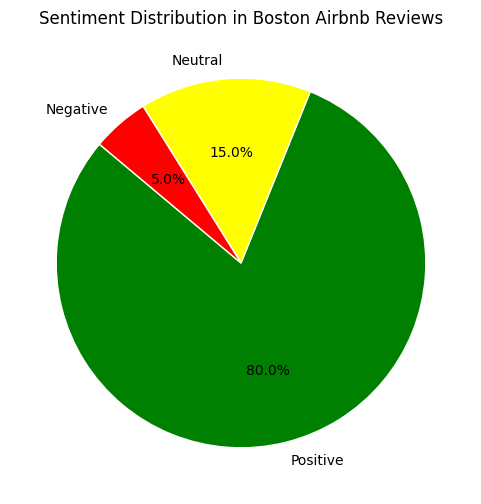

In [15]:
import matplotlib.pyplot as plt

# Define custom colors (order must match labels)
colors = ["green", "yellow", "red"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    result['count'],
    labels=result['sentiment'],
    autopct='%1.1f%%',       # Show percentages
    startangle=140,          # Rotate for better appearance
    colors=colors,           # Apply custom colors
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Sentiment Distribution in Boston Airbnb Reviews")
plt.show()

### Look at negative comments predicted by the model

In [16]:
# change column width to see full comments.
pd.set_option("display.max_colwidth", None) 

df[df['sentiment']=='Negative']['comments']

0    A very unique experience with some unfortunate issues that could not get worked out. Thought we could have a fun non-hotel experience while on a business trip. Hot water was only available for 1 out of 4 days and this was very uncomfortable given that I was with clients all week. Ryan sent over a manager each day that was unable to fix the problem.
Name: comments, dtype: object

# Evaluate Model Performance

Compare the human generated label with the prediction from BERT model

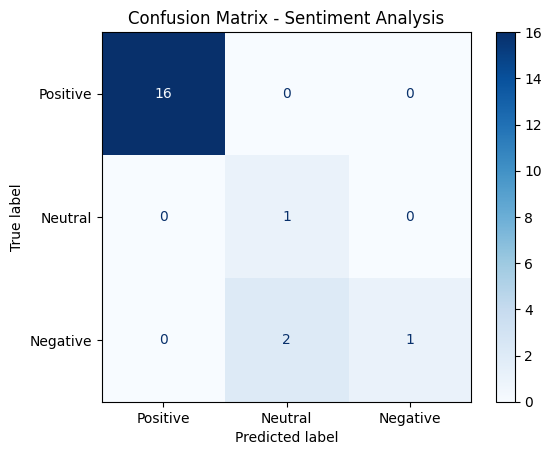

              precision    recall  f1-score   support

    Positive      1.000     1.000     1.000        16
     Neutral      0.333     1.000     0.500         1
    Negative      1.000     0.333     0.500         3

    accuracy                          0.900        20
   macro avg      0.778     0.778     0.667        20
weighted avg      0.967     0.900     0.900        20



In [17]:
# Evaluate the model performance

y_true = df['human_label']
y_pred = df['sentiment']
    
classification_evaluation(y_true, y_pred)

## Sentiment Classification Results Interpretation

## Key Metrics and Formulas

1. **Accuracy**  
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
$$

2. **Precision (per class)**  
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$  
Measures how many predicted positives are actually correct.

3. **Recall (per class)**  
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$  
Measures how many actual positives were correctly identified.

4. **F1 Score (per class)**  
$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
$$  
Balances precision and recall into a single metric.

---

### Interpretation of Results

**1. Confusion Matrix**  
- **Positive reviews**: Out of 16 true positives, the model correctly classified all 16 (perfect accuracy for this class).  
- **Neutral reviews**: Only 1 review labeled as Neutral, and the model correctly predicted it.  
- **Negative reviews**: Out of 3 true negatives, the model correctly identified 1 but misclassified 2 as Neutral.  

**2. Metrics Breakdown**  
- **Positive Class**:  
  - Precision = 1.00, Recall = 1.00, F1 = 1.00  
  - The model performs perfectly here, likely because this class dominates the dataset (16/20).  

- **Neutral Class**:  
  - Precision = 0.33, Recall = 1.00, F1 = 0.50  
  - The model captured the single Neutral review but also misclassified 2 Negatives as Neutral, leading to low precision.  

- **Negative Class**:  
  - Precision = 1.00, Recall = 0.33, F1 = 0.50  
  - The model is precise when it predicts Negative, but it misses most true Negative cases (low recall).  

**3. Overall Performance**  
- **Accuracy** = 90% (18 out of 20 reviews correctly classified).  
- **Macro Average (equal weight per class)**: F1 = 0.667 → reflects imbalance between classes.  
- **Weighted Average (weighted by support)**: F1 = 0.900 → high overall because Positive dominates.  

---

### Key Insights

- The model is **very strong at detecting Positive sentiment** (likely due to class imbalance).  
- Performance drops for **Neutral and Negative** classes, especially recall for Negative (only 1 of 3 detected).  
- With such a small sample (20 reviews, heavily skewed toward Positive), these results should be interpreted cautiously.  
- A larger, more balanced labeled dataset is needed for a fair evaluation.